In [ ]:
"""
Below is a requirements.txt that can be used to create a virtual environment for this notebook.
To install a kernel, do the following:
- Copy this text to a file named requirements.txt
- Create a virtual environment (we base ours on python==3.6.0), and enter the environment
- run command: pip install -r requirements.txt
- run command: ipython kernel install --user --name=<name you would like to give to the kernel>
- Close this notebook, open it back up, and change to the new kernel 
"""

####################################################

"""
backcall==0.2.0
certifi==2020.6.20
cycler==0.10.0
decorator==4.4.2
future==0.18.2
ipykernel==5.3.4
ipython==7.16.1
ipython-genutils==0.2.0
jedi==0.17.2
jupyter-client==6.1.7
jupyter-core==4.6.3
kiwisolver==1.2.0
matplotlib==3.3.2
numpy==1.19.2
parso==0.7.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.2.0
prompt-toolkit==3.0.7
ptyprocess==0.6.0
Pygments==2.7.1
pyparsing==2.4.7
python-dateutil==2.8.1
pyzmq==19.0.2
SimpleITK==2.0.0
six==1.15.0
torch==1.6.0
tornado==6.0.4
traitlets==4.3.3
wcwidth==0.2.5
"""

In [52]:
""""
This notebook can be used to determine whether you have written a model
that will satisfy the specifications needed to allow a data owner to 
produce outputs from your model via FeTS with the OpenFederatedLearning 
backend.

The requirements are provided below. The cells that follow can be used to further
ensure integration with FeTS and OpenFederatedLearning for inference will go smoothly.

----------------------------------------------------------------------------------
Requirements:
A python class providing access to your model, with two required instance methods. 

Please populate argument defaults where appropriate to allow for the optimal 
configuration, and document to allow users to understand how to customize.

Particularly relevant, will be that your model infer_volume method processes images according 
to our assumption on input and output shapes (see below).

The required instance methods are as follows:
"""

def __init__(self, *args, **kwargs):
    """
    Instantiates a properly configured model object, including population
    of all model weights from a model serialization file.
    
    Args: ...
        
    Kwargs: ...
      
    Returns:
        None
    """
    raise NotImplementedError()    
    

      
def infer_volume(self, X):
    """
    Perform model inference on a volume of data.
    
    Args:
        X (numpy array): Input volume to perform inference on, containing channels for
                         all scan modalities required for the model task. 
                         The expected input shape can be either:
                          (num_channels is the number of scanning modalities used by the model)
                         - channels first -
                         (num_samples, num_channels,coronal_axis_dim, sagittal_axis_dim, transversal_axis_dim)
                         - or channels last -
                         (num_samples,coronal_axis_dim, sagittal_axis_dim, transversal_axis_dim, num_channels)
      
    Returns:
        (numpy array): Model output for the input volume.
                       The output shape is as follows:
                       (num_samples, coronal_axis_dim, sagittal_axis_dim, transversal_axis_dim)
    """
    
    raise NotImplementedError()
        
  

In [3]:
"""
Run to import the module (co-located with this notebook) containing our supporting code
"""

from brats_inference_supporting_code import *

In [ ]:
"""
Insert or import your model in this cell 
"""

    
    
        

In [4]:
""" 
modify these lines and run to specify the following:
- scan modalities used by your model (in the order your model expects)
- dataset parent director
- output_tag (file suffix used in model output filename)
- channels_first boolean (determines whether your model expects to see the channels 
                          associated to the scanning modalities before the physical 
                          dimensions of the volume - as apposed to after)
"""

modalities = ['t1', 't2', 'flair', 't1ce']  # this should be the order your model expects
data_par_dir = "/raid/datasets/BraTS17/small_BraTS_sample"
output_tag = "Dummy_output"
channels_first = True



In [5]:
"""
Replace DummyModel with your model, and run to instantiate the base model
"""

base_model = DummyModel(channels_first=channels_first)

In [6]:
"""
Run this to instatiate the data object

Note: The associated data loader for this data object produces volumes of shape 
(1, n, 155, 240, 240) if channels_first==True [or (1, 155, 240, 240, n) if 
channels_first==False], where n is the number of scanning modalities that you specified above.
"""

input_data = PyTorchBrainMaGeData(feature_modes=modalities,
                                  channels_first=channels_first,
                                  data_path=data_par_dir)

In [7]:
"""
Run this to wrap your model
"""

wrapped_model = InferenceOnlyFLModelWrapper(data=input_data, base_model=base_model)

In [8]:
"""
Run this to test that inference is producing outputs. 
"""

test_inference(wrapped_model=wrapped_model, output_file_tag=output_tag)

Dummy model input shape is:  torch.Size([1, 4, 155, 240, 240])
Dummy model output shape is:  (1, 155, 240, 240)
Writing inference NIfTI image of shape (155, 240, 240) to /raid/datasets/BraTS17/small_BraTS_sample/Brats17_TCIA_444_1/Brats17_TCIA_444_1_Dummy_output.nii.gz
Dummy model input shape is:  torch.Size([1, 4, 155, 240, 240])
Dummy model output shape is:  (1, 155, 240, 240)
Writing inference NIfTI image of shape (155, 240, 240) to /raid/datasets/BraTS17/small_BraTS_sample/Brats17_TCIA_478_1/Brats17_TCIA_478_1_Dummy_output.nii.gz
Dummy model input shape is:  torch.Size([1, 4, 155, 240, 240])
Dummy model output shape is:  (1, 155, 240, 240)
Writing inference NIfTI image of shape (155, 240, 240) to /raid/datasets/BraTS17/small_BraTS_sample/Brats17_TCIA_396_1/Brats17_TCIA_396_1_Dummy_output.nii.gz
Dummy model input shape is:  torch.Size([1, 4, 155, 240, 240])
Dummy model output shape is:  (1, 155, 240, 240)
Writing inference NIfTI image of shape (155, 240, 240) to /raid/datasets/BraTS

In [9]:
"""
Run this to create the data object used to iterate over output images.
"""

output_data = PyTorchBrainMaGeData(feature_modes=modalities,
                                  channels_first=channels_first,
                                  data_path=data_par_dir, 
                                  outputs_only=True,
                                  output_tag=output_tag)

In [10]:
"""
Replace values below to select an output file index and scan modality to use 
in imaging the features along side the outputs
"""

idx = 2
mode = 1

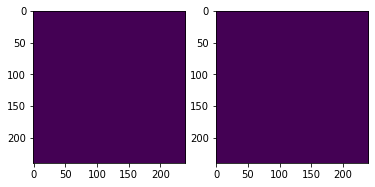

In [11]:
""" 
Run to produce the animation object that visualizes the inputs next to the outputs
Note: Please ignore the blank images below this cell
"""

animation = look_at_brains(input_data, output_data, channels_first, idx, mode)

In [12]:
""" 
Run to view the animation
"""

animation